## Task 1
Calculate for each name in yob2000.txt its percentage of total births. Store this percentage as an additional column.

In [ ]:
import pandas as pd

In [109]:
df= pd.read_csv('/Users/selva/Documents/DS_Proj_1.2/names/yob2000.txt', names=['Name', 'Gender', 'Count'])
Total_births = df['Count'].sum()
df['Percentage']=df['Count']/Total_births * 100
df

,Name,Gender,Count,Percentage
0,Emily,F,25957,0.686806
1,Hannah,F,23085,0.610814
2,Madison,F,19968,0.528341
3,Ashley,F,17997,0.476189
4,Sarah,F,17708,0.468542
...,...,...,...,...
29771,Zeph,M,5,0.000132
29772,Zeven,M,5,0.000132
29773,Ziggy,M,5,0.000132
29774,Zo,M,5,0.000132


## Task 2
Read all files yob1880.txt, yob1881.txt ... yob2021.txt. Add an extra column for the year. Concatenate them into a single data structure.

In [116]:
import os
import glob
path=os.getcwd()
csv_files=glob.glob(os.path.join('names','*.txt'))
files=[]
for f in csv_files:
    #read the txt file
    df=pd.read_csv(f,names=['Name','Gender','Count'])
    df['Year']=int(f[9:13])
    files.append(df)
concated=pd.concat(files)
concated

,Name,Gender,Count,Year
0,Emily,F,25957,2000
1,Hannah,F,23085,2000
2,Madison,F,19968,2000
3,Ashley,F,17997,2000
4,Sarah,F,17708,2000
...,...,...,...,...
32068,Zyheem,M,5,2019
32069,Zykel,M,5,2019
32070,Zyking,M,5,2019
32071,Zyn,M,5,2019


## Task 3
Calculate the total number of births for each year. Visualize the timeline as a line plot.

In [210]:
import matplotlib.pyplot as plt
%matplotlib inline
total_birth = concated.groupby('Year')['Count'].sum()
total_birth

Year
1880     201484
1881     192690
1882     221533
1883     216944
1884     243461
         ...   
2017    3570234
2018    3508655
2019    3461444
2020    3327419
2021    3361375
Name: Count, Length: 142, dtype: int64

Text(0.5, 1.0, 'Total number of births for each Year')

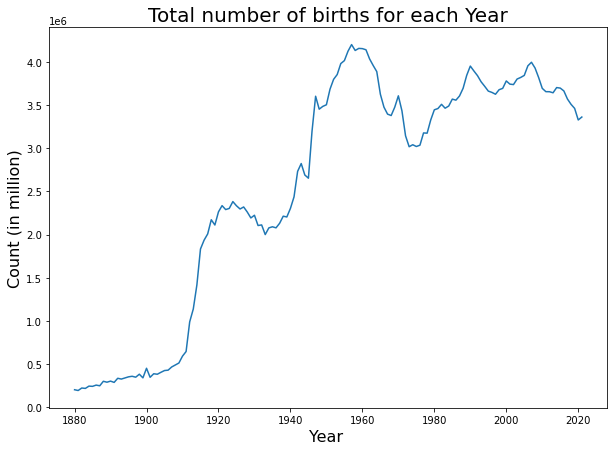

In [233]:
total_birth.plot(figsize=(10,7))
plt.xlabel("Year ", fontsize=16)
plt.ylabel("Count (in million)", fontsize=16)
plt.title("Total number of births for each Year", fontsize=20)

## Task 4
Now, create a timeline for your own name. First check if your name occurs at all. If yes, create a table with the columns year and number.

You may want to sum up the binary genders or choose one. With few exceptions, the influence on the result is tiny.

If your name is not very frequent, there might be missing data for some years. Insert missing data with a 0.

Draw a line plot and label the axes.

In [ ]:
# filling missing data with 0
concated['Count'].fillna(0, inplace=True)

In [241]:
# checking the name
my_name_count=(concated['Name'] == 'Selva').value_counts()
my_name_count

False    2052774
True           7
Name: Name, dtype: int64

In [242]:
# Creating the table
my_name = concated[concated['Name'] == 'Selva']
print(my_name)
my_name1 = my_name.groupby('Year')['Count'].sum()
print(my_name1)

       Name Gender  Count  Year
2900  Selva      F     10  1938
4180  Selva      F      6  1939
5157  Selva      F      6  1949
4275  Selva      F      6  1940
2181  Selva      F     15  1937
4102  Selva      F      6  1936
4866  Selva      F      5  1934
Year
1934     5
1936     6
1937    15
1938    10
1939     6
1940     6
1949     6
Name: Count, dtype: int64


Text(0.5, 1.0, 'Total number of births with name "Selva"')

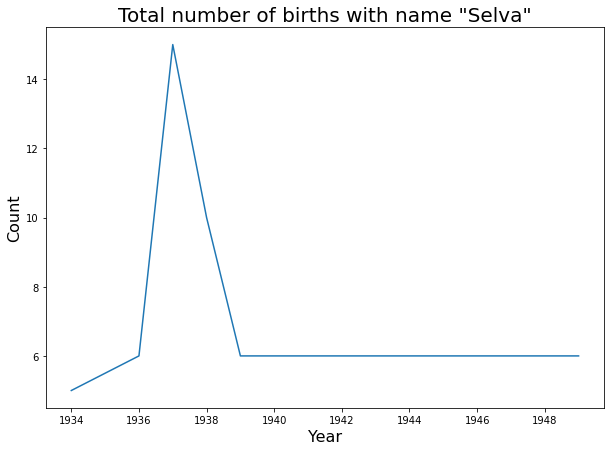

In [243]:

my_name1.plot(figsize=(10,7))
plt.xlabel('Year', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.title('Total number of births with name "Selva"', fontsize=20)


## Task 5
Investigate the popularity of the names of some US celebrities over the last 130 years. Plot a time line with 2-4 names.


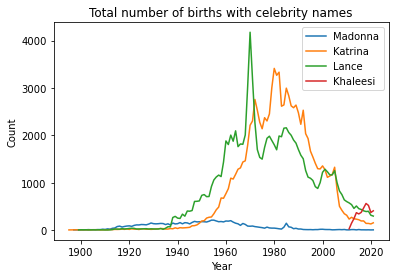

In [188]:
first_name = concated[concated['Name'] == 'Madonna']
second_name = concated[concated['Name'] == 'Katrina']
third_name = concated[concated['Name'] == 'Lance']
fourth_name = concated[concated['Name'] == 'Khaleesi']
first_name = first_name.groupby('Year')['Count'].sum()
second_name = second_name.groupby('Year')['Count'].sum()
third_name = third_name.groupby('Year')['Count'].sum()
fourth_name = fourth_name.groupby('Year')['Count'].sum()
ax = first_name.plot(label = 'Madonna', xlabel = 'Year', ylabel = 'Count', kind = 'line')
second_name.plot(label = 'Katrina', ax=ax)
third_name.plot(label = 'Lance', ax=ax)
fourth_name.plot(label = 'Khaleesi', ax=ax)
plt.legend()
plt.title('Total number of births with celebrity names')
plt.show()

## Task 6
Finally, we will normalize the data. Repeat Task 4 or 5, but divide the count of a given name by the total number of births of that year.

How does the result change and why is this important?



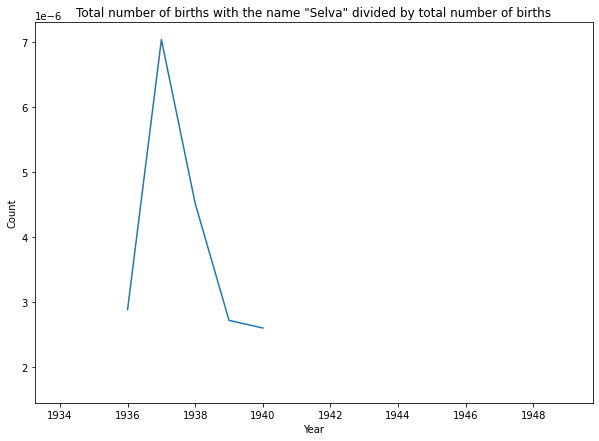

In [251]:
# timeline of name "Selva" divided by total number of birth
norm= my_name.groupby('Year')['Count'].sum()/total_birth

# line plot of timeline
norm.plot(xlabel = "Year",ylabel = "Count",figsize=(10,7))
plt.title('Total number of births with the name "Selva" divided by total number of births')
plt.show()


In [ ]:
Yes, the result has changed. As my name is available in limited count, the very least values gets normalised..